# S13 T01: Aprenentage Supervisat

In [1]:
#Imoporting packages
# ==============================================================================
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
import math


from sklearn import preprocessing as prp
from sklearn import model_selection as ms
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import ensemble
from sklearn import tree
from sklearn import metrics
from sklearn import dummy
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
#import sklearn.pipeline as pipeline 

from lazypredict.Supervised import LazyClassifier

# Pandas Configuration
# ==============================================================================
pd.set_option('float_format', '{:.2f}'.format) # float numbers with 2 decimals
pd.set_option("display.max_columns", None) # Display all columns

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')
dims = (20, 16)

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## **Nivell 1**

- ### **Exercici 1**

Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).

## **Importing the data**  
Import the dataset "Flights_Ready.csv". This dataset is the ready to use version of the dataset "DelayedFlights.cvs" as it has been previously analized and transformed to use in this project.  
You can see the transformations applied in [This notebook]()

In [2]:
flights_ready = pd.read_csv('../db/Flights/Flights_Ready.csv', index_col=0)
flights_ready.shape

(1928371, 25)

## **Converting the Target attribute into binary**

In [3]:
flights_ready["ArrDelay"].describe()

count   1928371.00
mean         42.20
std          56.78
min        -109.00
25%           9.00
50%          24.00
75%          56.00
max        2461.00
Name: ArrDelay, dtype: float64

In [4]:
arr_discrete = []
for item in flights_ready["ArrDelay"]: 
    if item <=10: 
        arr_discrete.append(0)
    else:
        arr_discrete.append(1)

flights_ready["ArrDelay"] = arr_discrete

[Text(0.25, 0, '0'), Text(0.75, 0, '1')]

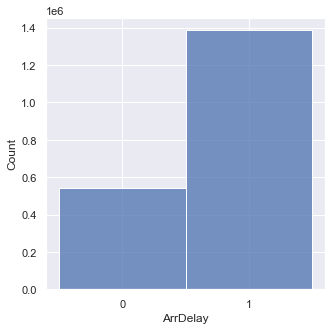

In [5]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(flights_ready["ArrDelay"], binwidth=0.5)
ax.set_xticks([0.25,0.75], minor=False)
ax.set_xticklabels([0,1])

## **Encodign the categoricl attributes**

In [6]:
#flights_ready.drop(axis=1, columns=['TailNum', 'FlightNum'], inplace=True)

encoder = prp.OrdinalEncoder()
flights_ready[['UniqueCarrier', 'Origin', 'Dest', 'TailNum', 'FlightNum']]= encoder.fit_transform(flights_ready[['UniqueCarrier', 'Origin', 'Dest', 'TailNum', 'FlightNum']])
flights_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928371 entries, 0 to 7009727
Data columns (total 25 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            int64  
 4   CRSDepTime         int64  
 5   ArrTime            int64  
 6   CRSArrTime         int64  
 7   UniqueCarrier      float64
 8   FlightNum          float64
 9   TailNum            float64
 10  ActualElapsedTime  int64  
 11  CRSElapsedTime     int64  
 12  AirTime            int64  
 13  ArrDelay           int64  
 14  DepDelay           int64  
 15  Origin             float64
 16  Dest               float64
 17  Distance           int64  
 18  TaxiIn             int64  
 19  TaxiOut            int64  
 20  CarrierDelay       int64  
 21  WeatherDelay       int64  
 22  NASDelay           int64  
 23  SecurityDelay      int64  
 24  LateAircraftDelay  int64  
dtypes: float64(5), int

## **Making a random sample containing 0.003% of the Dataset**

In [7]:
flights_sample = flights_ready.sample(frac=0.003,  random_state = 42)
flights_sample.to_csv('../db/Flights/Flights_Sample.csv')
del flights_ready
del arr_discrete

## **Split the dataset into training/test**

In [8]:
X = flights_sample.drop('ArrDelay', axis=1)
y = flights_sample['ArrDelay']

X_train, X_test, y_train, y_test = ms.train_test_split(X,y, test_size = 0.25, random_state=42)

print(f"Train X:{X_train.shape}, Train y:{y_train.shape}\nTest X:{X_test.shape}, {y_test.shape}")


Train X:(4338, 24), Train y:(4338,)
Test X:(1447, 24), (1447,)


## **Appling Classification Models to the dataset**

In [9]:
# Lazy Classifier
# ============================================================================

lazy_clas = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models, prediction = lazy_clas.fit(X_train, X_test, y_train, y_test)
lazy_df = pd.DataFrame(models)

 28%|██▊       | 8/29 [00:01<00:03,  6.12it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 93%|█████████▎| 27/29 [00:08<00:00,  4.26it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:09<00:00,  3.10it/s]


[(-0.5, 1.0)]

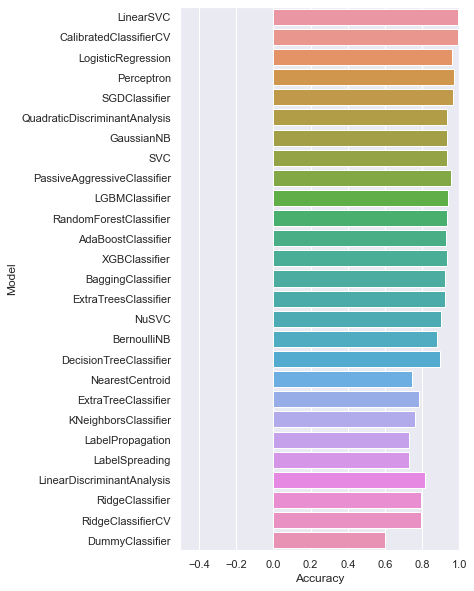

In [10]:
# Display  Predictions Graph with LazzyClassifier
# ============================================================================
# Using this early classification we can choose the different methods depending on his performance

plt.figure(figsize=(5, 10))
ax = sns.barplot(y=lazy_df.index, x="Accuracy", data=lazy_df)
ax.set(xlim=(-0.5, 1))

From the early analisis provided by the Lazy Classifier we choos three models (top, middle and bottom) based on their Accuracy:  
    - Logistic Refression (Top)  
    - Support Vector Machines (Middle)  
    - K Neighbors (Bottom)

In [11]:
# Dummy Classifier
# ============================================================================
dummy_clf = dummy.DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)

# Logistic Regression
# ============================================================================
logreg = lm.LogisticRegression()
logreg.fit(X_train, y_train)

# K Neigbors 
# ============================================================================
kn_class = KNeighborsClassifier(n_jobs=3)
kn_class.fit(X_train, y_train)

# Support Vector Machines 
# ============================================================================
svm_class = svm.LinearSVC()
svm_class.fit(X_train, y_train)

LinearSVC()


- ## **Exercici 2**

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

In [12]:
# Seeing the results of Lazy Classifier
# =======================================================
lazy_df.sort_values(["Accuracy", "ROC AUC"], ascending=[False, True])
lazy_df

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.99,0.99,0.99,0.99,0.15
CalibratedClassifierCV,0.99,0.99,0.99,0.99,0.69
LogisticRegression,0.96,0.97,0.97,0.96,0.10
Perceptron,0.97,0.97,0.97,0.97,0.04
SGDClassifier,0.97,0.96,0.96,0.97,0.05
QuadraticDiscriminantAnalysis,0.94,0.96,0.96,0.94,0.03
GaussianNB,0.94,0.96,0.96,0.94,0.02
SVC,0.93,0.95,0.95,0.93,0.54
PassiveAggressiveClassifier,0.96,0.94,0.94,0.96,0.05


## **Obtaining the predicted data from each Classificator**

In [13]:
predict_dict = {"Dummy Class":dummy_clf.predict(X_test),
                "Logistic Reg": logreg.predict(X_test),
                "SVM":svm_class.predict(X_test),
                "K Neigbohrs":kn_class.predict(X_test)}

## **Classification Reports**

In [14]:
for key, value in predict_dict.items():
    print(key,":\n",metrics.classification_report(y_test, value))

Dummy Class :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       399
           1       0.72      1.00      0.84      1048

    accuracy                           0.72      1447
   macro avg       0.36      0.50      0.42      1447
weighted avg       0.52      0.72      0.61      1447

Logistic Reg :
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       399
           1       0.95      0.96      0.95      1048

    accuracy                           0.93      1447
   macro avg       0.92      0.91      0.92      1447
weighted avg       0.93      0.93      0.93      1447

SVM :
               precision    recall  f1-score   support

           0       0.98      0.65      0.78       399
           1       0.88      0.99      0.94      1048

    accuracy                           0.90      1447
   macro avg       0.93      0.82      0.86      1447
weighted avg       0.91      0.90   

## **Comparing the estimarots for each model**

In [15]:
model_names = ['Dummy', 'Log Reg', 'KN Class', 'SVM Class']

def ModelEvaluator(model_list, X_test, y_test, model_names):
    models = model_list
    scores_dict={}
    for model, name in zip(models, model_names):
        scores = {'Precision':metrics.precision_score(y_test, model.predict(X_test)),
                'Recall':metrics.recall_score(y_test,model.predict(X_test)),
                'Accuracy':metrics.accuracy_score(y_test, model.predict(X_test)),
                'B-Accuracy':metrics.balanced_accuracy_score(y_test, model.predict(X_test)),
                'F1 Score':metrics.f1_score(y_test, model.predict(X_test)),
                'Roc_AUC':metrics.roc_auc_score(y_test, model.predict(X_test)),
                'Confusion Matrix':metrics.confusion_matrix(y_test, model.predict(X_test))}
        scores_dict[name] = scores
        scores_df = pd.DataFrame.from_dict(scores_dict).transpose()

    return scores_df

In [16]:
pd.set_option('float_format', '{:.4f}'.format) # float numbers with 4 decimals
raw_models = ModelEvaluator([dummy_clf, logreg, kn_class, svm_class], X_test, y_test, model_names )
raw_models

,Precision,Recall,Accuracy,B-Accuracy,F1 Score,Roc_AUC,Confusion Matrix
Dummy,0.7243,1.0000,0.7243,0.5000,0.8401,0.5000,"[[0, 399], [0, 1048]]"
Log Reg,0.9508,0.9580,0.9337,0.9138,0.9544,0.9138,"[[347, 52], [44, 1004]]"
KN Class,0.7496,0.8626,0.6918,0.5529,0.8021,0.5529,"[[97, 302], [144, 904]]"
SVM Class,0.8831,0.9943,0.9005,0.8242,0.9354,0.8242,"[[261, 138], [6, 1042]]"


[]

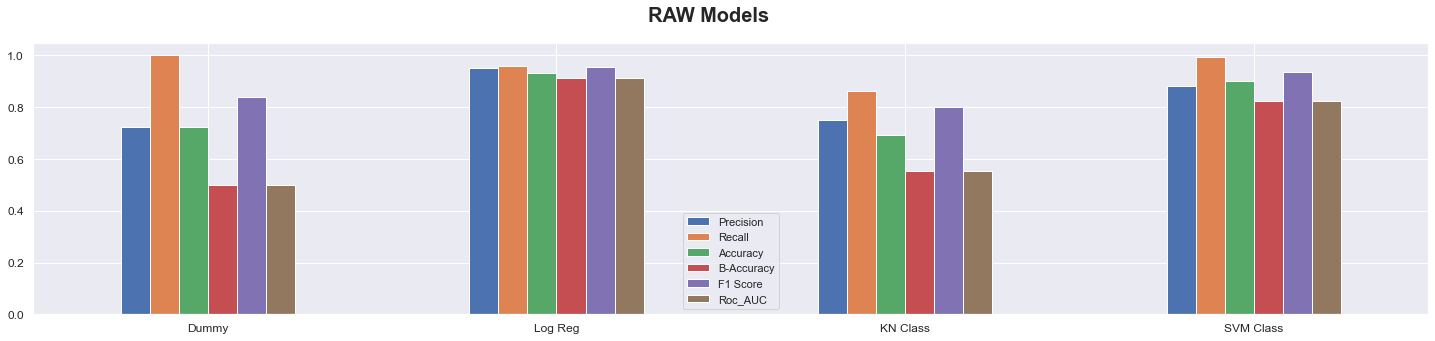

In [17]:
fig, ax = plt.subplots()
raw_models.plot(kind='bar', subplots=False, layout=(1,6), figsize=(25,5), rot=0, fontsize=12, ax=ax)
fig.suptitle('RAW Models', fontsize=20, weight='bold')
plt.plot()

## **Confusion Matrix**

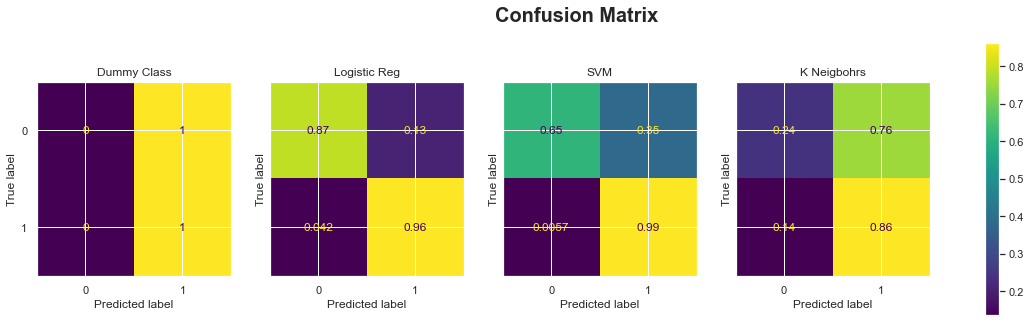

In [18]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey='row')

count = 0
for key, value in predict_dict.items():
    cm = metrics.confusion_matrix(y_test, value, normalize='true')
    cmdisplay = metrics.ConfusionMatrixDisplay(cm)
    cmdisplay.plot(ax=ax[count])
    cmdisplay.ax_.set_title(key)
    cmdisplay.im_.colorbar.remove()
    count+=1
    
plt.subplots_adjust(wspace=0.20, hspace=0.1)
fig.colorbar(cmdisplay.im_, ax=ax)
fig.suptitle('Confusion Matrix', fontsize = 20, fontweight = "bold", ha='center')
plt.show()

Text(0.5, 0.98, 'Raw ROC Curves')

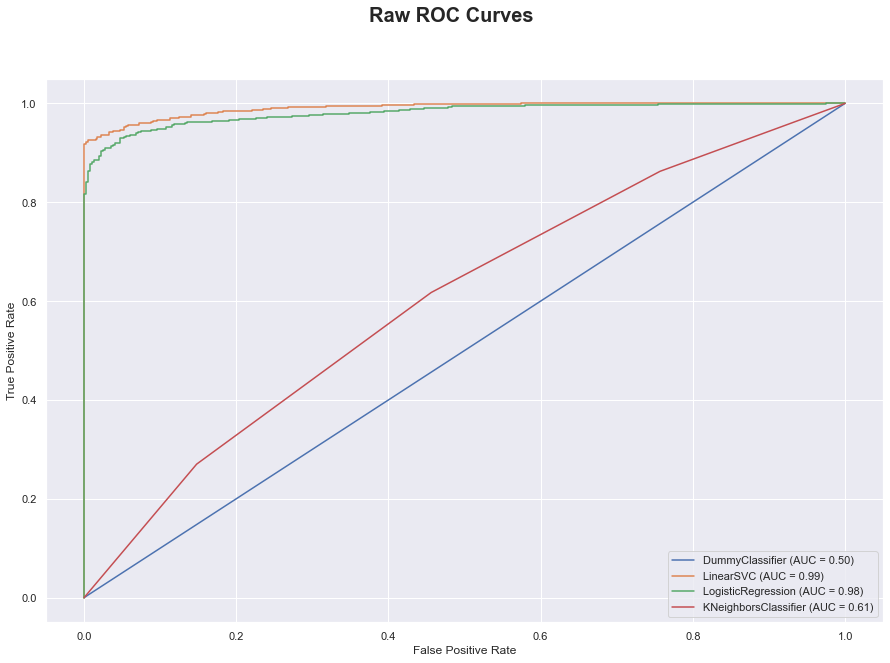

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
roc_dummy = metrics.plot_roc_curve(dummy_clf, X_test, y_test, ax=ax)
roc_svm = metrics.plot_roc_curve(svm_class, X_test, y_test, ax=ax)
roc_logreg = metrics.plot_roc_curve(logreg, X_test, y_test, ax=ax)
roc_kn = metrics.plot_roc_curve(kn_class, X_test, y_test, ax=ax)
fig.suptitle('Raw ROC Curves', fontsize = 20, fontweight = "bold", ha='center')

- ### **Exercici 3**

Entrena’ls utilitzant els diferents paràmetres que admeten.  

Per realitzar aquesta part utilitzarem el métode [Ranomized Search CV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) el  cual optimizta el parametres realitzant un Cross Validation amb els diferents valors indicats per a cada parámetre.

In [20]:
def rand_search_eval(classifier, distribution):
    rscv = ms.RandomizedSearchCV(classifier, distribution, n_iter=50, n_jobs=3, cv=3, random_state=42, return_train_score=False, refit=True)
    rscv_search = rscv.fit(X_train,y_train)
    rscv_statistics = {
        'Best Score': rscv_search.best_score_,
        'Best Parameters':rscv_search.best_params_}
    rscv_results = pd.DataFrame(rscv_search.cv_results_)
    return (rscv_statistics, rscv_results)

In [27]:
classifiers = [logreg, svm_class, kn_class]
distributions ={
    "LogReg": dict(fit_intercept=[True, False], penalty=['l1', 'l2','elasticnet'], class_weight=['balanced', None]),
    "SVM":dict(penalty=['l1', 'l2'], fit_intercept=[True, False], class_weight=['balanced', None], max_iter=[500, 1000, 2500]),
    "K Neighbors":dict(n_neighbors=[2,5,8], weights=['uniform', 'distance'], algorithm=['ball_tree', 'kd_tree', 'brute'])
}

In [22]:
logreg_rscv_statistics, logreg_rscv_results = rand_search_eval(logreg, distributions['LogReg'])
logreg_rscv_statistics

{'Best Score': 0.9230059935454126,
 'Best Parameters': {'penalty': 'l2',
  'fit_intercept': False,
  'class_weight': None}}

In [29]:
kn_rscv_statistics, kn_rscv_results = rand_search_eval(kn_class, distributions['K Neighbors'])
kn_rscv_statistics

{'Best Score': 0.6975564776394653,
 'Best Parameters': {'weights': 'distance',
  'n_neighbors': 8,
  'algorithm': 'ball_tree'}}

In [30]:
svm_rscv_statistics, svm_rscv_results = rand_search_eval(svm_class, distributions['SVM'])
svm_rscv_statistics

{'Best Score': 0.9299216228676809,
 'Best Parameters': {'penalty': 'l2',
  'max_iter': 2500,
  'fit_intercept': False,
  'class_weight': 'balanced'}}

## **Setting the new models with the optimized parameters**

In [31]:
# Logistic Regression
# ============================================================================
logreg_opt = lm.LogisticRegression(penalty='l2', fit_intercept=False, class_weight=None, random_state=42)
logreg_opt.fit(X_train, y_train)

# K Neigbors 
# ============================================================================
kn_class_opt = KNeighborsClassifier(weights='distance', n_neighbors=8, algorithm='ball_tree', n_jobs=3)
kn_class_opt.fit(X_train, y_train)

# Support Vector Machines 
# ============================================================================
svm_class_opt = svm.LinearSVC(penalty='l2', max_iter=2500, fit_intercept=False, class_weight='balanced', random_state=42)
svm_class_opt.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, max_iter=2500,
          random_state=42)

In [32]:
opt_models = ModelEvaluator([dummy_clf, logreg_opt, kn_class_opt, svm_class_opt], X_test, y_test, model_names)
opt_models

,Precision,Recall,Accuracy,B-Accuracy,F1 Score,Roc_AUC,Confusion Matrix
Dummy,0.7243,1.0000,0.7243,0.5000,0.8401,0.5000,"[[0, 399], [0, 1048]]"
Log Reg,0.9473,0.9599,0.9323,0.9098,0.9536,0.9098,"[[343, 56], [42, 1006]]"
KN Class,0.7412,0.8884,0.6945,0.5369,0.8082,0.5369,"[[74, 325], [117, 931]]"
SVM Class,1.0000,0.8655,0.9026,0.9327,0.9279,0.9327,"[[399, 0], [141, 907]]"


[]

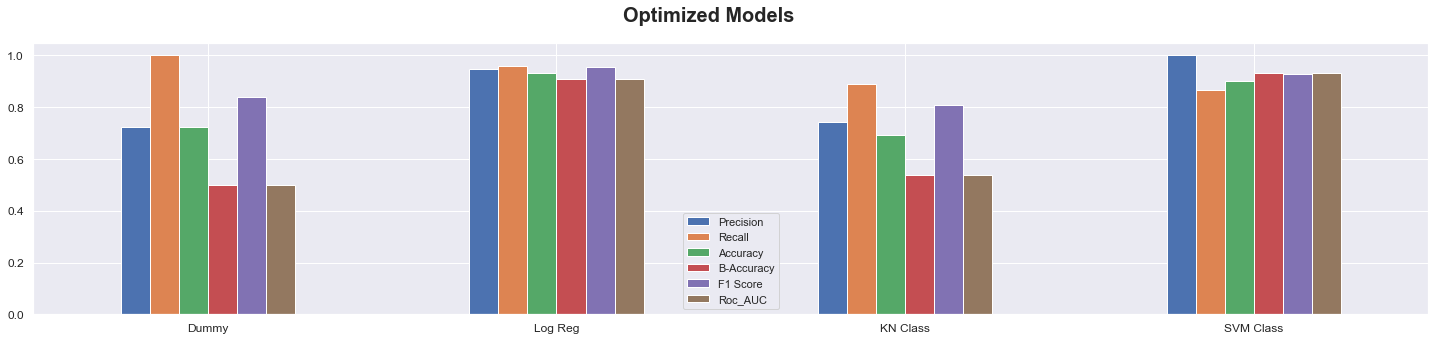

In [33]:
fig, ax = plt.subplots()
opt_models.plot(kind='bar', subplots=False, layout=(1,6), figsize=(25,5), rot=0, fontsize=12, ax=ax)
fig.suptitle('Optimized Models', fontsize=20, weight='bold')
plt.plot()

Text(0.5, 0.98, 'Optimized ROC Curves')

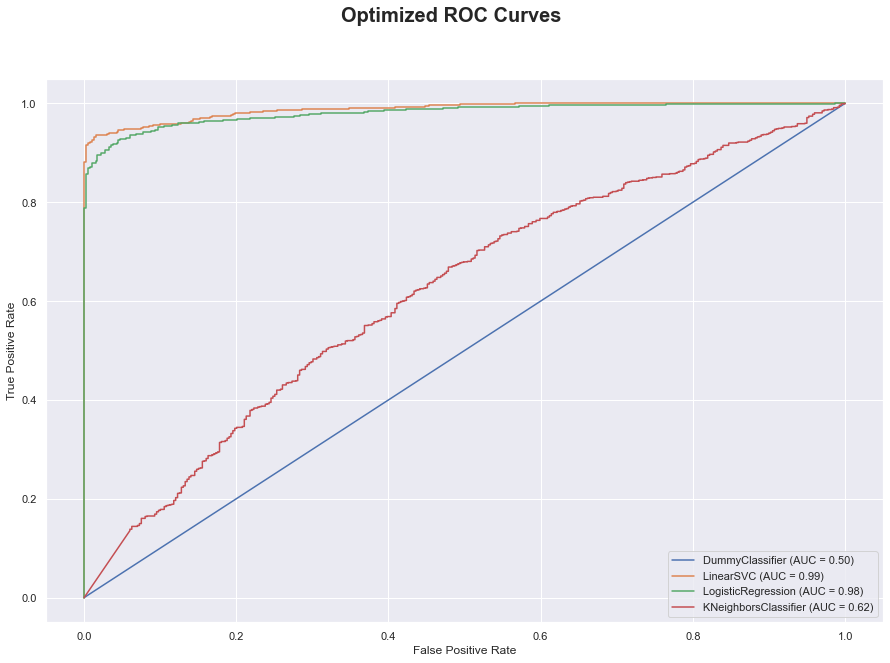

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
roc_dummy = metrics.plot_roc_curve(dummy_clf, X_test, y_test, ax=ax)
roc_svm = metrics.plot_roc_curve(svm_class_opt, X_test, y_test, ax=ax)
roc_logreg = metrics.plot_roc_curve(logreg_opt, X_test, y_test, ax=ax)
roc_kn = metrics.plot_roc_curve(kn_class_opt, X_test, y_test, ax=ax)
fig.suptitle('Optimized ROC Curves', fontsize = 20, fontweight = "bold", ha='center')

- ### **Exercici 4**

Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.

In [35]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [36]:
opt_model_list = [dummy_clf, logreg_opt, kn_class_opt, svm_class_opt]

predicted_cv = {}
scores_dict={}
for model, name in zip(opt_model_list, model_names): 
    y_pred_cv = ms.cross_val_predict(model, X, y, cv=10, n_jobs=3)
    predicted_cv[name] = y_pred_cv
    scores = {'Precision':metrics.precision_score(y, y_pred_cv),
            'Recall':metrics.recall_score(y, y_pred_cv),
            'Accuracy':metrics.accuracy_score(y, y_pred_cv),
            'B-Accuracy':metrics.balanced_accuracy_score(y, y_pred_cv),
            'F1 Score':metrics.f1_score(y, y_pred_cv),
            'Roc_AUC':metrics.roc_auc_score(y, y_pred_cv),
            'Confusion Matrix':metrics.confusion_matrix(y, y_pred_cv)}
    scores_dict[name] = scores
cv_models = pd.DataFrame.from_dict(scores_dict).transpose()
cv_models

,Precision,Recall,Accuracy,B-Accuracy,F1 Score,Roc_AUC,Confusion Matrix
Dummy,0.7272,1.0000,0.7272,0.5000,0.8421,0.5000,"[[0, 1578], [0, 4207]]"
Log Reg,0.9496,0.9403,0.9203,0.9036,0.9449,0.9036,"[[1368, 210], [251, 3956]]"
KN Class,0.7442,0.8840,0.6947,0.5371,0.8081,0.5371,"[[300, 1278], [488, 3719]]"
SVM Class,0.9672,0.9527,0.9421,0.9333,0.9599,0.9333,"[[1442, 136], [199, 4008]]"


[]

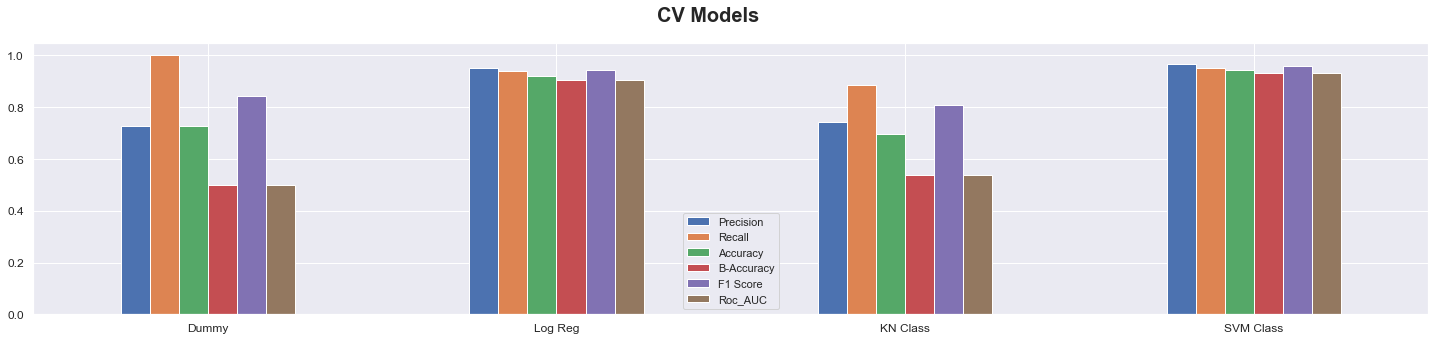

In [37]:
fig, ax = plt.subplots()
cv_models.plot(kind='bar', subplots=False, layout=(1,6), figsize=(25,5), rot=0, fontsize=12, ax=ax)
fig.suptitle('CV Models', fontsize=20, weight='bold')
plt.plot()

In [42]:
resume = pd.concat([raw_models, opt_models, cv_models], axis=0, keys=['RAW', 'OPT', 'CV']).reorder_levels(order=[1,0])
resume.sort_index()

Precision Recall Accuracy B-Accuracy F1 Score Roc_AUC  \
Dummy     CV     0.7272 1.0000   0.7272     0.5000   0.8421  0.5000   
          OPT    0.7243 1.0000   0.7243     0.5000   0.8401  0.5000   
          RAW    0.7243 1.0000   0.7243     0.5000   0.8401  0.5000   
KN Class  CV     0.7442 0.8840   0.6947     0.5371   0.8081  0.5371   
          OPT    0.7412 0.8884   0.6945     0.5369   0.8082  0.5369   
          RAW    0.7496 0.8626   0.6918     0.5529   0.8021  0.5529   
Log Reg   CV     0.9496 0.9403   0.9203     0.9036   0.9449  0.9036   
          OPT    0.9473 0.9599   0.9323     0.9098   0.9536  0.9098   
          RAW    0.9508 0.9580   0.9337     0.9138   0.9544  0.9138   
SVM Class CV     0.9672 0.9527   0.9421     0.9333   0.9599  0.9333   
          OPT    1.0000 0.8655   0.9026     0.9327   0.9279  0.9327   
          RAW    0.8831 0.9943   0.9005     0.8242   0.9354  0.8242   

                         Confusion Matrix  
Dummy     CV       [[0, 1578], [0, 4207]]  
          OPT       [[0, 399], [0, 1048]]  
          RAW       [[0, 399], [0, 1048]]  
KN Class  CV   [[300, 1278], [488, 3719]]  
          OPT     [[74, 325], [117, 931]]  
          RAW     [[97, 302], [144, 904]]  
Log Reg   CV   [[1368, 210], [251, 3956]]  
          OPT     [[343, 56], [42, 1006]]  
          RAW     [[347, 52], [44, 1004]]  
SVM Class CV   [[1442, 136], [199, 4008]]  
          OPT      [[399, 0], [141, 907]]  
          RAW     [[261, 138], [6, 1042]]

In [95]:
resume_t = resume.drop('Confusion Matrix', axis=1).transpose()
resume_t = resume_t.sort_index(1, level=0, sort_remaining=True)
resume_t


Dummy               KN Class               Log Reg                \
               CV    OPT    RAW       CV    OPT    RAW      CV    OPT    RAW   
Precision  0.7272 0.7243 0.7243   0.7442 0.7412 0.7496  0.9496 0.9473 0.9508   
Recall     1.0000 1.0000 1.0000   0.8840 0.8884 0.8626  0.9403 0.9599 0.9580   
Accuracy   0.7272 0.7243 0.7243   0.6947 0.6945 0.6918  0.9203 0.9323 0.9337   
B-Accuracy 0.5000 0.5000 0.5000   0.5371 0.5369 0.5529  0.9036 0.9098 0.9138   
F1 Score   0.8421 0.8401 0.8401   0.8081 0.8082 0.8021  0.9449 0.9536 0.9544   
Roc_AUC    0.5000 0.5000 0.5000   0.5371 0.5369 0.5529  0.9036 0.9098 0.9138   

           SVM Class                
                  CV    OPT    RAW  
Precision     0.9672 1.0000 0.8831  
Recall        0.9527 0.8655 0.9943  
Accuracy      0.9421 0.9026 0.9005  
B-Accuracy    0.9333 0.9327 0.8242  
F1 Score      0.9599 0.9279 0.9354  
Roc_AUC       0.9333 0.9327 0.8242

array([[<AxesSubplot:title={'center':'(Dummy, CV)'}>,
        <AxesSubplot:title={'center':'(Dummy, OPT)'}>,
        <AxesSubplot:title={'center':'(Dummy, RAW)'}>],
       [<AxesSubplot:title={'center':'(KN Class, CV)'}>,
        <AxesSubplot:title={'center':'(KN Class, OPT)'}>,
        <AxesSubplot:title={'center':'(KN Class, RAW)'}>],
       [<AxesSubplot:title={'center':'(Log Reg, CV)'}>,
        <AxesSubplot:title={'center':'(Log Reg, OPT)'}>,
        <AxesSubplot:title={'center':'(Log Reg, RAW)'}>],
       [<AxesSubplot:title={'center':'(SVM Class, CV)'}>,
        <AxesSubplot:title={'center':'(SVM Class, OPT)'}>,
        <AxesSubplot:title={'center':'(SVM Class, RAW)'}>]], dtype=object)

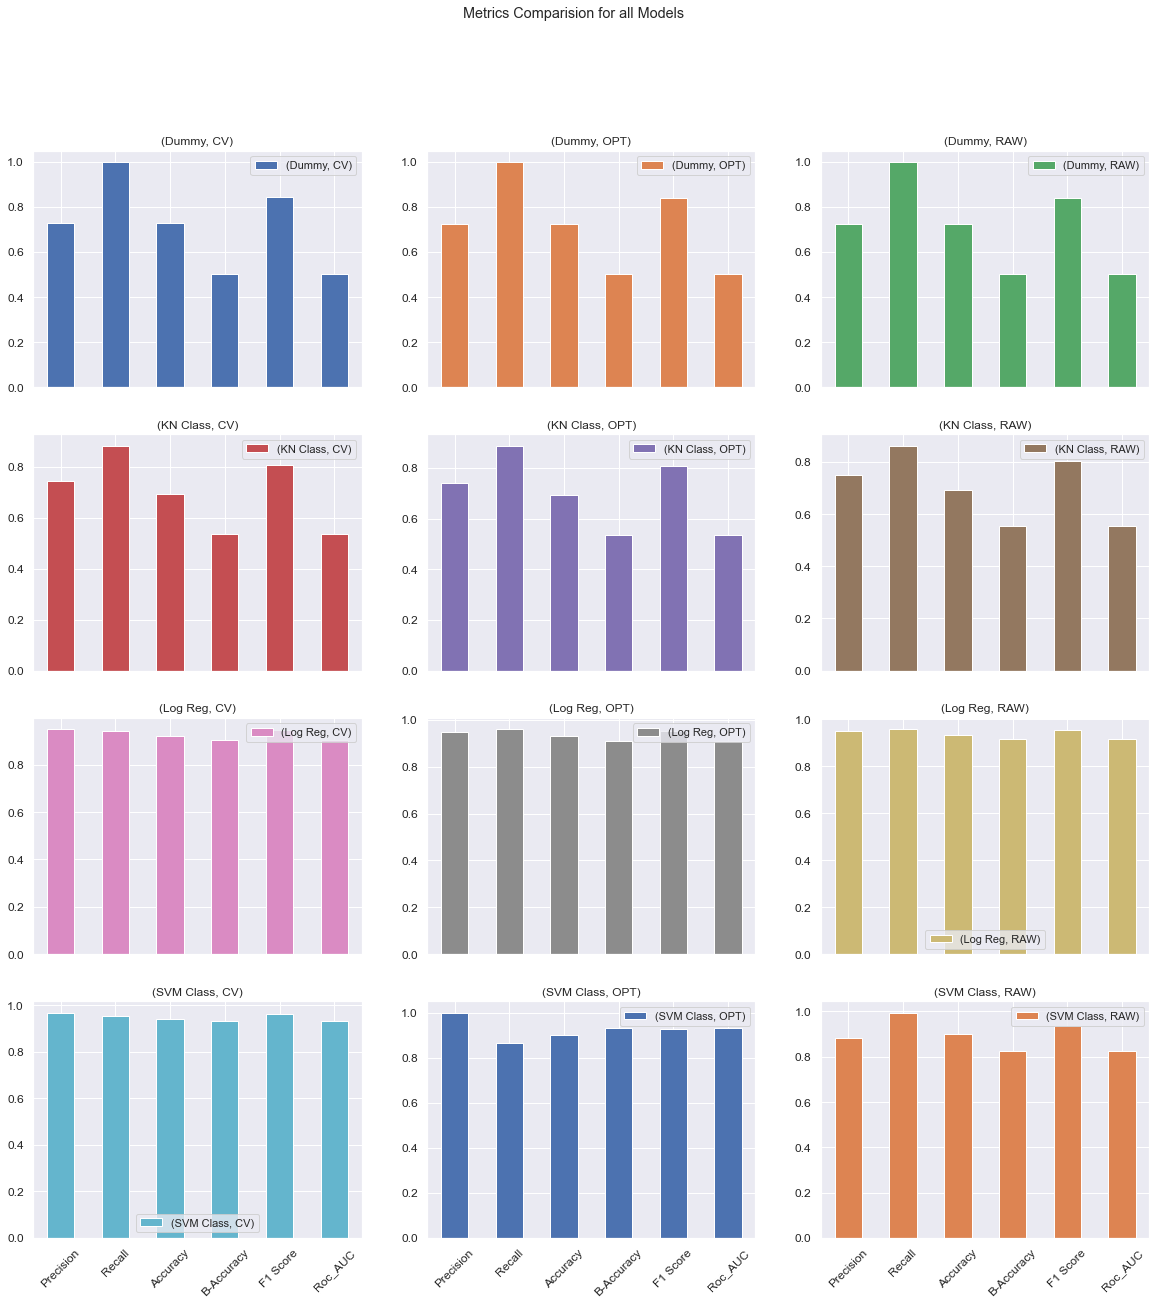

In [115]:
resume_t.plot(kind='bar', figsize=(20,20), subplots=True, layout=(4,3), rot=45, fontsize=12, title='Metrics Comparision for all Models')